In [1]:
import gudhi as gd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pickle

from matplotlib.pyplot import figure

from pygenstability import plotting
from pygenstability.optimal_scales import *
from pygenstability.pygenstability import evaluate_NVI

In [2]:
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from msfiltration import MCF

In [3]:
root_fig = '/home/tc/OneDrive/Software/MSFiltration/figures/'

In [4]:
plt.rcParams.update({'font.size': 20})

# Load data

In [25]:
root_MCD = '/home/tc/OneDrive/Research Projects/Multiscale Clustering Filtration/MCD_ThomasBeaney/'

# Load data (deserialize)
with open(root_MCD+"MCD_results_optimal_cknn10.pkl", 'rb') as handle:
    all_results = pickle.load(handle)

In [6]:
all_results.keys()

dict_keys(['run_params', 'scales', 'number_of_communities', 'stability', 'community_id', 'NVI', 'ttprime', 'block_detection_curve', 'selected_partitions'])

In [7]:
partitions = all_results["community_id"]
log_scales = np.log10(all_results['scales'])

[<AxesSubplot:xlabel='$log_{10}(t)$', ylabel='$log_{10}(t^\\prime)$'>,
 <AxesSubplot:xlabel='$log_{10}(t)$', ylabel='NVI'>,
 <AxesSubplot:ylabel='Stability'>,
 <AxesSubplot:ylabel='# clusters'>,
 <AxesSubplot:xlabel='$log_{10}(t)$', ylabel='Block NVI'>]

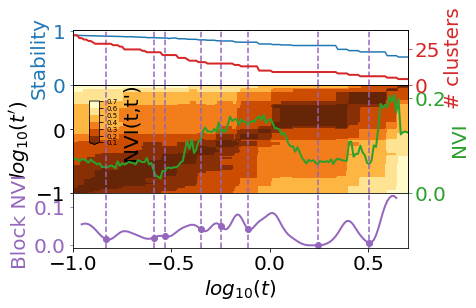

In [8]:
plotting.plot_scan(all_results)

In [20]:
n_partitions = len(partitions)
n_nodes = len(partitions[0])

In [26]:
partitions_matrix = np.zeros((n_nodes,n_partitions))

for i in range(0,n_partitions):
    partitions_matrix[:,i] = partitions[i]

partitions_matrix = np.asarray(partitions_matrix, dtype="int")

np.savetxt(root_MCD+"MCD_Partitions.csv", partitions_matrix.astype(int), fmt='%i', delimiter=',')

# Apply MCF

In [32]:
# initialise MCF object
mcf = MCF()
mcf.load_data(partitions,np.arange(1,n_partitions+1))

# build filtration and compute PH
mcf.build_filtration()
mcf.compute_persistence()

Constructing filtration with GUDHI ...


100%|██████████| 150/150 [00:00<00:00, 303.52it/s]

Computing persistence with GUDHI ... 


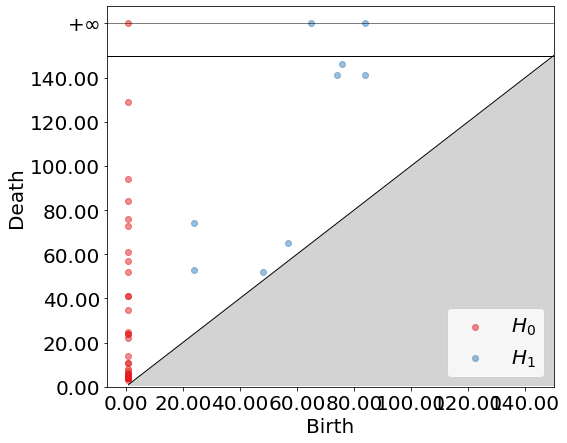

In [33]:
# Plot persistence diagram with optimal scales
ax = mcf.plot_persistence_diagram()

In [35]:
mcf.persistence[1]

array([[ 48.,  52.],
       [ 24.,  53.],
       [ 57.,  65.],
       [ 24.,  74.],
       [ 84., 141.],
       [ 74., 141.],
       [ 76., 146.],
       [ 65.,  inf],
       [ 84.,  inf]])

In [50]:
partitions[-1][np.asarray([51, 99, 23, 70,198, 211, 76, 198,8, 76,32, 68, 23, 51, 28, 32, 68, 145, 8, 99, 28, 70, 145, 211])-1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [51]:
partitions[-1][np.asarray([61, 145,155, 181,123, 155,26, 123,25, 26,51, 99,23, 70,198, 211,76, 198,8, 76,32, 68,22, 61,2, 22,23, 51,28, 32,68, 145,25, 206,8, 99,2, 206,28, 70,181, 211])-1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
[97, 187,30, 97,33, 34,31, 33,20, 31,61, 145,23, 70,189, 190,188, 189,63, 113,49, 63,21, 49,9, 21,58, 64,32, 68,22, 61,2, 22,30, 34,64, 113,20, 149,58, 190,28, 32,23, 188,68, 145,2, 150,9, 187,28, 70,149, 150]

In [52]:
partitions[-1][np.asarray([97, 187,30, 97,33, 34,31, 33,20, 31,61, 145,23, 70,189, 190,188, 189,63, 113,49, 63,21, 49,9, 21,58, 64,32, 68,22, 61,2, 22,30, 34,64, 113,20, 149,58, 190,28, 32,23, 188,68, 145,2, 150,9, 187,28, 70,149, 150])-1]

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2])

In [85]:
partitions[20][np.asarray([154, 169, 153, 154, 62, 207, 62, 162, 153, 205, 169, 187,162, 205,187, 207])-1]

array([27, 27, 27, 27, 11, 11, 11, 22, 27,  5, 27,  8, 22,  5,  8, 11])

In [57]:
mcf.persistence[0][:,1]

array([  3.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   6.,
         6.,   6.,   6.,   7.,   8.,  11.,  11.,  14.,  22.,  24.,  24.,
        25.,  35.,  41.,  41.,  52.,  57.,  61.,  73.,  76.,  84.,  94.,
       129.,  inf])

In [56]:
death_julia = np.asarray([3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 6.0, 6.0, 6.0, 6.0, 7.0, 9.0, 11.0, 11.0, 14.0, 22.0, 24.0, 24.0, 25.0, 35.0, 41.0, 48.0, 57.0, 61.0, 67.0, 73.0, 76.0, 90.0, 94.0, 129.0, np.Inf])

In [58]:
death_gudhi = mcf.persistence[0][:,1]

In [65]:
not_equal = np.where(death_julia!=death_gudhi)

In [66]:
death_julia[not_equal]

array([ 9., 48., 57., 61., 67., 90.])

In [67]:
death_gudhi[not_equal]

array([ 8., 41., 52., 57., 61., 84.])

In [74]:
partitions[7][np.asarray([195,179])]

array([0, 0])

# Analyse hierarchy of partitions using $\beta_0$

In [16]:
from msfiltration.msf_properties import compute_rank, compute_beta_0

In [17]:
rank = compute_rank(mcf)
beta_0 = compute_beta_0(mcf)

ValueError: x and y must have same first dimension, but have shapes (150,) and (0,)

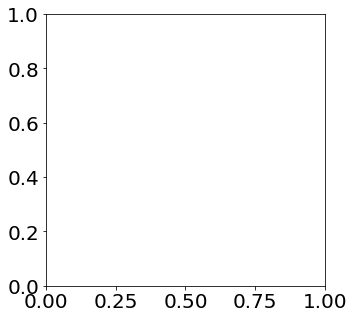

In [14]:
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.plot(log_scales,rank, label = 'rank(P)')
ax.plot(log_scales,beta_0[:-1], label = r'$\beta_0$')
ax.set(xlabel=r'$\log(t)$')
ax.legend()

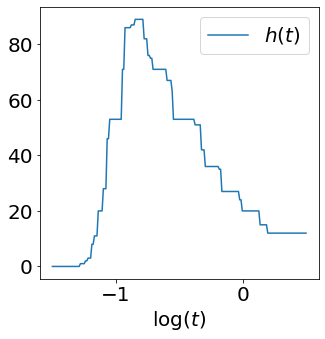

In [ ]:
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.plot(msf.log_scales,(rank-beta_0[:-1]), label = r'$h(t)$')
ax.set(xlabel=r'$\log(t)$')
ax.legend()
plt.show()

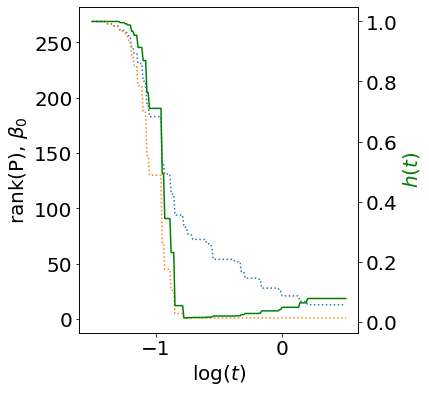

In [ ]:
fig, ax1 = plt.subplots(1, figsize=(5, 6))
ax1.plot(msf.log_scales,rank, label = 'rank(P)',ls=':')
ax1.plot(msf.log_scales,beta_0[:-1], label = r'$\beta_0$',ls=':')
ax1.set(xlabel=r'$\log(t)$',ylabel=r'rank(P), $\beta_0$')
handles1, labels = plt.gca().get_legend_handles_labels()
ax2 = ax1.twinx()
ax2.plot(msf.log_scales,beta_0[:-1]/rank, label = r'$h(t)$',c='green')
ax2.set_ylabel(r'$h(t)$', color="green")
#ax2.tick_params("y", colors="green")
handles2, labels = plt.gca().get_legend_handles_labels()

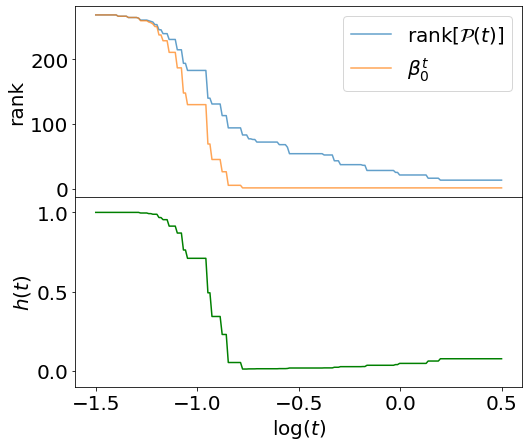

In [ ]:
fig, axs = plt.subplots(2, figsize=(8, 7))
fig.subplots_adjust(hspace=0.0, wspace=0.3)
ax1 = axs[0]
ax2 = axs[1]
ax1.plot(msf.log_scales,rank, label = r'rank$[\mathcal{P}(t)]$',alpha=0.7)#,ls=':')
ax1.plot(msf.log_scales,beta_0[:-1], label = r'$\beta_0^t$',alpha=0.7)#,ls=':')
ax1.set(xticks=[],ylabel=r'rank')

ax1.legend()

ax2.plot(msf.log_scales,beta_0[:-1]/rank, label = r'$h(t)$',c='green')
ax2.set_ylabel(r'$h(t)$')#, color="green")
ax2.set(xlabel=r'$\log(t)$',ylim=(-0.1,1.1))